### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Артамонов Т.Е.
##### Группа:   НКНбд-01-21

## Москва 2024
***

### Вариант № 4

1. Набор данных: forest_fires 

2. Независимая переменная: features/DC 

3. Зависимая переменная: features/DMC 

4. Визуализация для независимой переменной – эмпирическая функция распределения 

5. Визуализация для зависимой переменной – диаграмма размаха 

6. Показатель качества регрессии – R^2 (коэффициент детерминации) 

### Задание 1. 
Загрузите набор данных forest_fires из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая features/DC и features/DMC. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией.


### Решение

In [1]:
import tensorflow_datasets as tfds
import numpy as np

Загружаем датасет

In [2]:
df = tfds.as_dataframe(tfds.load("forest_fires", split="train"))
df.head()

,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/X,features/Y,features/day,features/month,features/rain,features/temp,features/wind
0,10.820000,671.200012,181.100006,96.099998,14.300000,63.0,7,5,1,7,6.4,27.299999,4.9
1,24.590000,750.500000,96.699997,90.500000,11.400000,55.0,3,4,6,8,0.0,20.600000,5.4
2,0.170000,607.099976,131.699997,94.300003,22.700001,55.0,6,5,1,7,0.0,19.400000,4.0
3,14.680000,671.200012,181.100006,96.099998,14.300000,27.0,3,4,1,7,0.0,32.299999,2.2
4,88.489998,699.599976,133.300003,92.900002,9.200000,21.0,4,4,2,8,0.0,26.400000,4.5


Удаляем признаки, принимающие дискретные значения

In [3]:
df.drop(columns=['features/X', 'features/Y', 'features/day', 'features/month'],inplace=True)
df.head()

,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/rain,features/temp,features/wind
0,10.820000,671.200012,181.100006,96.099998,14.300000,63.0,6.4,27.299999,4.9
1,24.590000,750.500000,96.699997,90.500000,11.400000,55.0,0.0,20.600000,5.4
2,0.170000,607.099976,131.699997,94.300003,22.700001,55.0,0.0,19.400000,4.0
3,14.680000,671.200012,181.100006,96.099998,14.300000,27.0,0.0,32.299999,2.2
4,88.489998,699.599976,133.300003,92.900002,9.200000,21.0,0.0,26.400000,4.5


Строим матрицу корреляции признаков и вычисляем номера признаков с наименьшим и наибольшим значением корреляции
- Признаки с наибольшей корреляцией features/DC и features/DMC
- Признаки с наименьшей корреляцией area и features/rain

In [4]:
npdf = np.array(df.corr())
m = 1
n = 0
L = [[], []]
for i in range (len(npdf)-1):
    for j in range (i+1, len(npdf)):
        if abs(npdf[i][j]) < m:
            m = npdf[i][j]
            L[0] = [i,j]
        if npdf[i][j] > n:
            n = npdf[i][j]
            L[1] = [i,j]
print("Номера столбцов с минимальной корреляцией:", [L[0][0], L[0][1]]) # 0 6 - area features/rain
print("Номера столбцов с максимальной корреляцией:", [L[1][0], L[1][1]]) # 1 2 - features/DC features/DMC
df.corr()

Номера столбцов с минимальной корреляцией: [0, 6]
Номера столбцов с максимальной корреляцией: [1, 2]


,area,features/DC,features/DMC,features/FFMC,features/ISI,features/RH,features/rain,features/temp,features/wind
area,1.000000,0.049383,0.072994,0.040122,0.008258,-0.075519,-0.007366,0.097844,0.012317
features/DC,0.049383,1.000000,0.682192,0.330512,0.229154,-0.039192,0.035861,0.496208,-0.203466
features/DMC,0.072994,0.682192,1.000000,0.382619,0.305128,0.073795,0.074790,0.469594,-0.105342
features/FFMC,0.040122,0.330512,0.382619,1.000000,0.531805,-0.300995,0.056702,0.431532,-0.028485
features/ISI,0.008258,0.229154,0.305128,0.531805,1.000000,-0.132517,0.067668,0.394287,0.106826
features/RH,-0.075519,-0.039192,0.073795,-0.300995,-0.132517,1.000000,0.099751,-0.527390,0.069410
features/rain,-0.007366,0.035861,0.074790,0.056702,0.067668,0.099751,1.000000,0.069491,0.061119
features/temp,0.097844,0.496208,0.469594,0.431532,0.394287,-0.527390,0.069491,1.000000,-0.227116
features/wind,0.012317,-0.203466,-0.105342,-0.028485,0.106826,0.069410,0.061119,-0.227116,1.000000


### Задание 2. Выполните визуализацию независимой и зависимой переменных в виде эмпирической функции распределения и диаграммы размаха соответственно.

### Решение
Напишем эмирическую функцию распределения

In [5]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

Выберем столбец с независимым признаком и разобьём его так, чтобы в нем было 500 значений 

In [6]:
samples = df['features/DC']
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

Выберем столбец с зависимым признаком

In [7]:
import pandas as pd
df_ECDF = pd.DataFrame(ylist, columns=['features/DC'],index=xlist)
df_ECDF


,features/DC
7.900000,0.001934
9.605400,0.003868
11.310800,0.003868
13.016200,0.003868
14.721600,0.003868
...,...
852.072952,0.990329
853.778352,0.990329
855.483752,0.998066
857.189151,0.998066


Построим график эмпирической функции для независимого признака

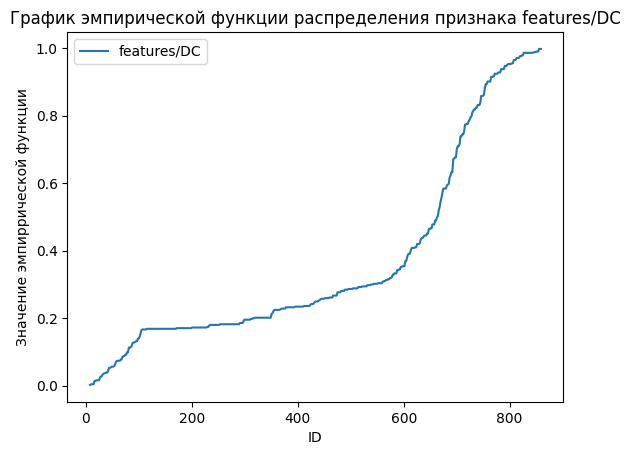

In [8]:
import matplotlib
import matplotlib.pyplot as plt
df_ECDF.plot.line(title='График эмпирической функции распределения признака features/DC', xlabel = 'ID', ylabel = 'Значение эмпиррической функции');

Построим диаграмму размаха для зависимого признака

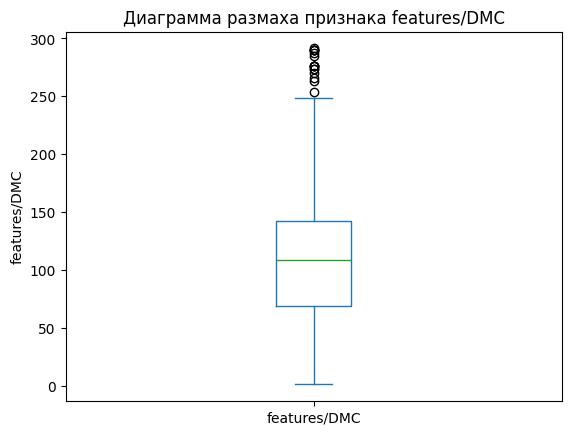

In [9]:
df['features/DMC'].plot.box(title='Диаграмма размаха признака features/DMC', ylabel = 'features/DMC');

### Задание 3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их.

### Решение
Построим диаграмму рассеивания

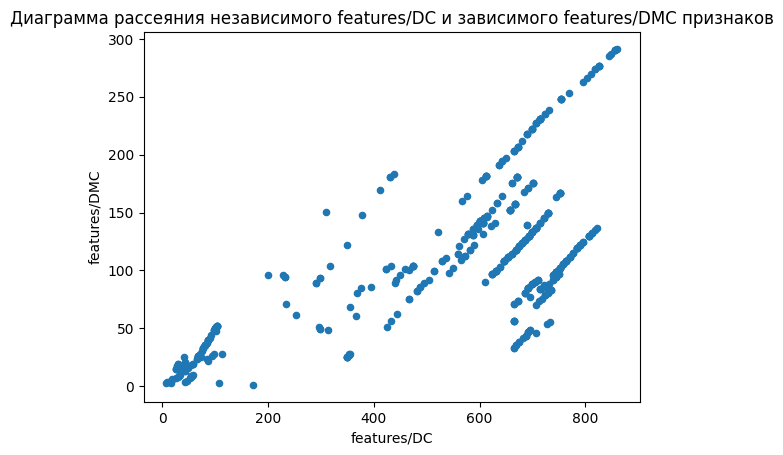

In [10]:
df.plot.scatter('features/DC','features/DMC',title='Диаграмма рассеяния независимого features/DC и зависимого features/DMC признаков')

Нет ярко выраженных одиноких точек

### Задание 4. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества R^2 (коэффициенту детерминации).

### Решение
Напишем класс для линейной регрессии

In [11]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

Разобьём зависимый и независимый признаки на тренировчную и тестовую части для обучения нейросети

In [12]:
from sklearn.model_selection import train_test_split
y = df['features/DMC']
x = df['features/DC']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


Воспользуемся точным подходом

In [13]:
from sklearn.metrics import r2_score
reg1 = SimpleLinReg()
reg1.fit(x_test, y_test)
y_predict = reg1.predict(x_test)


Обучим нейросеть с одним слоем и одним нейроном

In [14]:
import tensorflow as tf
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)
model.fit(x_train, y_train, epochs = 100)


Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 198.8440 - mean_absolute_error: 198.8440
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 64.3241 - mean_absolute_error: 64.3241
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 41.7490 - mean_absolute_error: 41.7490
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 41.6724 - mean_absolute_error: 41.6724
Epoch 5/100
13/13 [==============================] - 0s 1000us/step - loss: 39.3811 - mean_absolute_error: 39.3811
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 37.9956 - mean_absolute_error: 37.9956
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 39.5668 - mean_absolute_error: 39.5668
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 35.9680 - mean_absolute_error: 35.9680
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 39.3786 - mean_absolute_er

Оценим оба похода с помощью коэффициента детерминации $R^2$

In [15]:

y_predict2 = model.predict(x_test)
r2_1 = r2_score(y_test, y_predict)
r2_2 = r2_score(y_test, y_predict2)
print("R^2 точного подхода:", r2_1, "\nR^2 нейросети:", r2_2)

4/4 [==============================] - 0s 2ms/step
R^2 точного подхода: 0.4113491876516414 
R^2 нейросети: 0.40188809882284804


Точный подход даёт лучший показатель $R^2$

### Задание 5. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии. 

### Решение

Text(0.5, 0, 'features/DC')

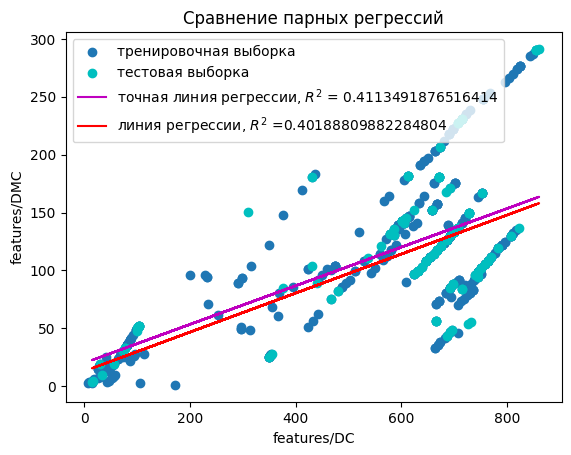

In [16]:
plt.scatter(x_train, y_train, label="тренировочная выборка")
plt.scatter(x_test, y_test, c='c', label="тестовая выборка")
plt.plot(x_test, y_predict, c='m', label='точная линия регрессии, $R^2$ = ' + str(r2_1))
plt.plot(x_test, y_predict2, c='r', label='линия регрессии, $R^2$ =' + str(r2_2))
plt.legend()
plt.title("Сравнение парных регрессий")
plt.ylabel("features/DMC")
plt.xlabel("features/DC")

### Задание 6. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака). Нормализуйте зависимый признак.

### Решение
Нормализуем зависимый признак

In [17]:
cols = ['area', 'features/DC','features/FFMC', 'features/ISI', 'features/RH', 'features/rain' ,'features/temp', 'features/wind']
Y0 = df['features/DMC']
Y = (Y0 - Y0.mean()) / Y0.std()


Разобьем выборку на тренировочную и тестовую части, создадим нормализованный слой

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(df[cols], Y, test_size=0.2, random_state=1)
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)
#normalizer.adapt(X_test)

### Задание 7. Используя созданный нормализующий слой и нормализованный зависимый признак, постройте регресоры на базе следующих моделей множественной регрессии:
- линейной регрессии
- гребневой регрессии (L2)
- лассо регрессии (L1)
* Выберите коэффициенты регуляризации l1 и l2 так, чтобы нейронные сети для всех трех моделей обучались (значение ошибки уменьшалось в процессе обучения).

### Решение
Построим модель линейной регрессии

In [19]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history = linear_model.fit(
    X_train, Y_train,
    epochs=100,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)


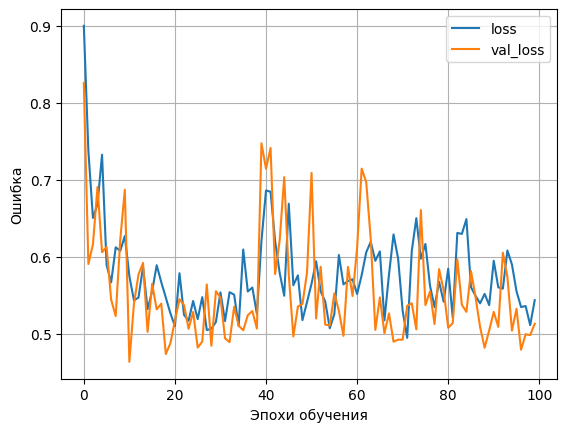

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(True)
plot_loss(history)


Построим модель регрессии лассо

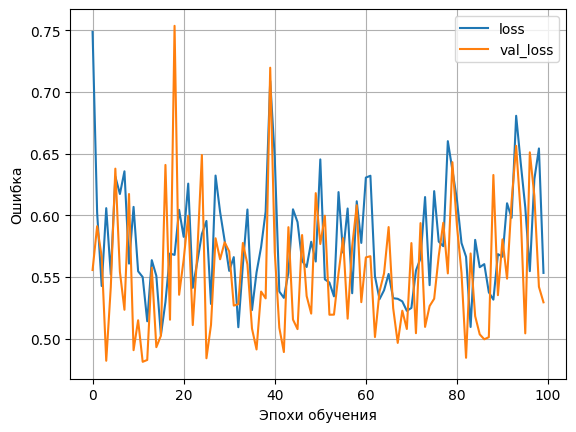

In [21]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.005))
])

l1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history1 = l1_model.fit(
    X_train, Y_train,
    epochs=100,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)
plot_loss(history1)

Построим модель гребневой регрессии

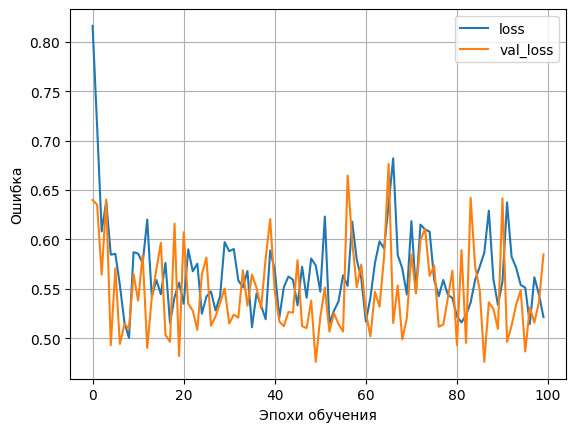

In [22]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1,
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.003))
])

l2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')

history2 = l2_model.fit(
    X_train, Y_train,
    epochs=100,
    # подавляем вывод
    verbose=0,
    # проверка (валидация) на 20% обучающих данных
    validation_split = 0.2)
plot_loss(history2)

#### Задание 7.1. Определите на контрольной выборке (с нормализованным зависимым признаком) модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.


#### Решение
Сравним модели, используя коэффициент $R^2$

In [23]:
r2_l = r2_score(Y_test, linear_model.predict(X_test))
r2_l1 = r2_score(Y_test, l1_model.predict(X_test))
r2_l2 = r2_score(Y_test, l2_model.predict(X_test))
print("R^2:\nLinear model:", r2_l, "\nL1 model:", r2_l1, "\nL2 model:", r2_l2)

4/4 [==============================] - 0s 1ms/step
R^2:
Linear model: 0.4000663039516734 
L1 model: 0.43240258049869584 
L2 model: 0.366411929228424


#### Задание 7.2. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

#### Решение

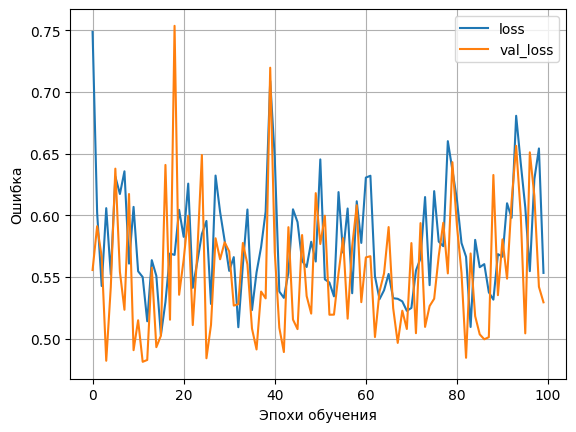

In [24]:
plot_loss(history1)


#### Задание 7.3. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

#### Решение

In [25]:
columns = ['area','features/FFMC', 'features/ISI', 'features/RH', 'features/rain' ,'features/temp', 'features/wind']
X_test[columns] = X_test[columns].median()
X_test

C:\Users\artam\AppData\Local\Temp\ipykernel_27324\2143457041.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test[columns] = X_test[columns].median()


,area,features/DC,features/FFMC,features/ISI,features/RH,features/rain,features/temp,features/wind
270,0.0,586.700012,91.699997,8.4,43.0,0.0,19.4,4.0
90,0.0,601.400024,91.699997,8.4,43.0,0.0,19.4,4.0
133,0.0,714.299988,91.699997,8.4,43.0,0.0,19.4,4.0
221,0.0,100.699997,91.699997,8.4,43.0,0.0,19.4,4.0
224,0.0,672.599976,91.699997,8.4,43.0,0.0,19.4,4.0
...,...,...,...,...,...,...,...,...
438,0.0,783.500000,91.699997,8.4,43.0,0.0,19.4,4.0
11,0.0,665.599976,91.699997,8.4,43.0,0.0,19.4,4.0
358,0.0,430.799988,91.699997,8.4,43.0,0.0,19.4,4.0
92,0.0,30.600000,91.699997,8.4,43.0,0.0,19.4,4.0


4/4 [==============================] - 0s 1ms/step


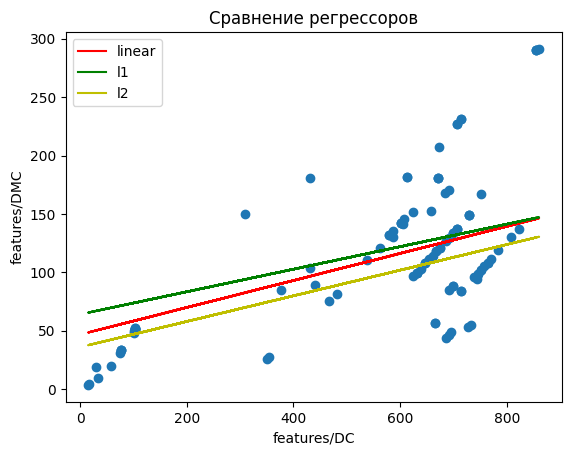

In [28]:
x = X_test['features/DC']
y = Y_test*Y0.std()+Y0.mean()
plt.scatter(x, y)
plt.plot(x, linear_model.predict(X_test)*Y0.std()+Y0.mean(), 'r', label='linear')
plt.plot(x, l1_model.predict(X_test)*Y0.std()+Y0.mean(), 'g', label='l1')
plt.plot(x, l2_model.predict(X_test)*Y0.std()+Y0.mean(), 'y', label='l2')
plt.xlabel('features/DC')
plt.ylabel('features/DMC')
plt.title("Сравнение регрессоров")
plt.legend()
